In [1]:
from brian2 import * 
from matplotlib import pyplot as plt
import json, socket, random
from enum import Enum
from topologia import topology, topology2, topology3

In [2]:
magic_network.schedule = ['start', 'groups', 'synapses', 'thresholds', 'resets', 'end'] 
t_run = 300*ms  
Numero_de_run = 0  
N = len(topology.keys()) 
vrest = -70.0*mV 
tau = 2*ms 
R = 300*Mohm

eqs = '''
    dv/dt = ((vrest - v) + R*I)/tau : volt (unless refractory)
    I : amp
    '''

# Criação dos neurônios comuns (neurons)
neurons = NeuronGroup(N, eqs, threshold='v>-60.0*mV', reset='v=vrest', refractory=3*ms, method='exact') #method='linear')
neurons.v = -80*mV
neurons.I = 0*pA 

indices = array([0,20]) # Qual neurônio dispara
times = array([10,20])*ms # Tempo de disparo do neurônio
prefs.codegen.target = "numpy"
inp = SpikeGeneratorGroup(N, indices, times, when='before_synapses')

Stimulus = Synapses(inp, neurons, on_pre='v_post += 11*mV')
for item in range(N):
    Stimulus.connect(i=item, j=item)
    
syn = Synapses(neurons, neurons, 'w : volt', on_pre='v_post += w')

for item in range(N): 
    if ("#" + str(item)) in topology:
        info_json = topology[("#" + str(item))]
        if info_json["syns"]:
            info_json_syns = info_json["syns"]
            n_connections = len(info_json_syns)
            for xpto in range(n_connections):
                liga_json = info_json_syns[xpto][0]
                delay_json = info_json_syns[xpto][1]
                w_json = info_json_syns[xpto][2]
                syn.connect(i=item, j=liga_json) 
                syn.w[item, liga_json] = w_json*mV
                syn.delay[item, liga_json] = delay_json*ms
                
state_mon = StateMonitor(neurons, 'v', record = True)
spike_mon_neurons = SpikeMonitor(neurons)
spike_mon_input = SpikeMonitor(inp)

net = Network(neurons, inp, Stimulus, syn)
net.add(state_mon)
net.add(spike_mon_neurons)  
net.add(spike_mon_input)
net.run(t_run)

(-5.0, 300.0)

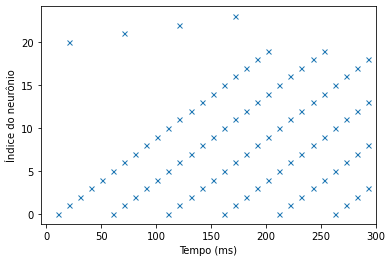

In [3]:
plot(spike_mon_neurons.t/ms, spike_mon_neurons.i, 'x', markersize = 5)
xlabel('Tempo (ms)')
ylabel('Índice do neurônio')
xlim(-5, 300)

In [4]:
print(
    list(spike_mon_neurons.t/ms)[list(spike_mon_neurons.i).index(20)],
    list(spike_mon_neurons.t/ms)[list(spike_mon_neurons.i).index(21)],
    list(spike_mon_neurons.t/ms)[list(spike_mon_neurons.i).index(22)],
    list(spike_mon_neurons.t/ms)[list(spike_mon_neurons.i).index(23)]
)

20.099999999999998 70.7 121.2 171.70000000000002


In [5]:
spike_mon_neurons.t/ms

array([ 10.1,  20.1,  20.2,  30.3,  40.4,  50.5,  60.6,  60.6,  70.7,
        70.7,  70.7,  80.8,  80.8,  90.9,  90.9, 101. , 101. , 111.1,
       111.1, 111.1, 121.2, 121.2, 121.2, 121.2, 131.3, 131.3, 131.3,
       141.4, 141.4, 141.4, 151.5, 151.5, 151.5, 161.6, 161.6, 161.6,
       161.6, 171.7, 171.7, 171.7, 171.7, 171.7, 181.8, 181.8, 181.8,
       181.8, 191.9, 191.9, 191.9, 191.9, 202. , 202. , 202. , 202. ,
       212.1, 212.1, 212.1, 212.1, 222.2, 222.2, 222.2, 222.2, 232.3,
       232.3, 232.3, 232.3, 242.4, 242.4, 242.4, 242.4, 252.5, 252.5,
       252.5, 252.5, 262.6, 262.6, 262.6, 262.6, 272.7, 272.7, 272.7,
       272.7, 282.8, 282.8, 282.8, 282.8, 292.9, 292.9, 292.9, 292.9])

In [6]:
list(spike_mon_neurons.i).index(20)

1

In [10]:
[i for i, x in enumerate(list(spike_mon_neurons.i)) if x == 5]

[7, 18, 34, 55, 75]

In [9]:
spike_mon_neurons.i[:10]

array([ 0, 20,  1,  2,  3,  4,  0,  5,  1,  6])

#### Teste da escolha aleatória

In [ ]:
magic_network.schedule = ['start', 'groups', 'synapses', 'thresholds', 'resets', 'end'] 
t_run = 300*ms  
Numero_de_run = 0  
N = len(topology2.keys()) 
vrest = -70.0*mV 
tau = 2*ms 
R = 300*Mohm

eqs = '''
    dv/dt = ((vrest - v) + R*I)/tau : volt (unless refractory)
    I : amp
    '''

# Criação dos neurônios comuns (neurons)
neurons = NeuronGroup(N, eqs, threshold='v>-60.0*mV', reset='v=vrest', refractory=3*ms, method='exact') #method='linear')
neurons.v = -80*mV
neurons.I = 0*pA 


indices = array([0, 15]) # Qual neurônio dispara
times = array([10, 15])*ms # Tempo de disparo do neurônio
inp = SpikeGeneratorGroup(N, indices, times, when='before_synapses')

Stimulus = Synapses(inp, neurons, on_pre='v_post += 11*mV')
for item in range(N):
    Stimulus.connect(i=item, j=item)
    
syn = Synapses(neurons, neurons, 'w : volt', on_pre='v_post += w')

for item in range(N): 
    if ("#" + str(item)) in topology2:
        info_json = topology2[("#" + str(item))]
        if info_json["syns"]:
            info_json_syns = info_json["syns"]
            n_connections = len(info_json_syns)
            for xpto in range(n_connections):
                liga_json = info_json_syns[xpto][0]
                delay_json = info_json_syns[xpto][1]
                w_json = info_json_syns[xpto][2]
                syn.connect(i=item, j=liga_json) 
                syn.w[item, liga_json] = w_json*mV
                syn.delay[item, liga_json] = delay_json*ms
                
state_mon = StateMonitor(neurons, 'v', record = True)
spike_mon_neurons = SpikeMonitor(neurons)
spike_mon_input = SpikeMonitor(inp)

net = Network(neurons, inp, Stimulus, syn)
net.add(state_mon)
net.add(spike_mon_neurons)  
net.add(spike_mon_input)
net.run(t_run)

(-5.0, 300.0)

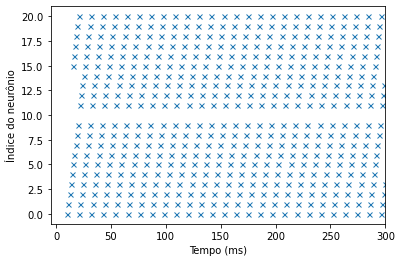

In [9]:
plot(spike_mon_neurons.t/ms, spike_mon_neurons.i, 'x', markersize = 5)
xlabel('Tempo (ms)')
ylabel('Índice do neurônio')
xlim(-5, 300)

In [10]:
set(list(spike_mon_neurons.i))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}

In [11]:
len(list(spike_mon_neurons.i))

523

In [12]:
[i for i, x in enumerate(list(spike_mon_neurons.i)) if x == 0]

[0,
 16,
 36,
 56,
 76,
 96,
 116,
 136,
 156,
 176,
 196,
 216,
 236,
 256,
 276,
 296,
 316,
 336,
 356,
 376,
 396,
 416,
 436,
 456,
 476,
 496,
 516]

In [13]:
spike_mon_neurons.t/ms

array([ 10.1,  11.2,  12.3,  13.4,  14.5,  15.1,  15.6,  16.2,  16.7,
        17.3,  17.8,  18.4,  18.9,  19.5,  20. ,  20.6,  21.1,  21.7,
        22.2,  22.8,  23.3,  23.9,  24.4,  25. ,  25.5,  26.1,  26.6,
        27.2,  27.7,  28.3,  28.8,  29.4,  29.9,  30.5,  31. ,  31.6,
        32.1,  32.7,  33.2,  33.8,  34.3,  34.9,  35.4,  36. ,  36.5,
        37.1,  37.6,  38.2,  38.7,  39.3,  39.8,  40.4,  40.9,  41.5,
        42. ,  42.6,  43.1,  43.7,  44.2,  44.8,  45.3,  45.9,  46.4,
        47. ,  47.5,  48.1,  48.6,  49.2,  49.7,  50.3,  50.8,  51.4,
        51.9,  52.5,  53. ,  53.6,  54.1,  54.7,  55.2,  55.8,  56.3,
        56.9,  57.4,  58. ,  58.5,  59.1,  59.6,  60.2,  60.7,  61.3,
        61.8,  62.4,  62.9,  63.5,  64. ,  64.6,  65.1,  65.7,  66.2,
        66.8,  67.3,  67.9,  68.4,  69. ,  69.5,  70.1,  70.6,  71.2,
        71.7,  72.3,  72.8,  73.4,  73.9,  74.5,  75. ,  75.6,  76.1,
        76.7,  77.2,  77.8,  78.3,  78.9,  79.4,  80. ,  80.5,  81.1,
        81.6,  82.2,

In [14]:
spike_mon_neurons.i

<spikemonitor_2.i: array([ 0,  1,  2,  3,  4, 15,  5, 16,  6, 17,  7, 18,  8, 19,  9, 20,  0,
       11,  1, 12,  2, 13,  3, 14,  4, 15,  5, 16,  6, 17,  7, 18,  8, 19,
        9, 20,  0, 11,  1, 12,  2, 13,  3, 14,  4, 15,  5, 16,  6, 17,  7,
       18,  8, 19,  9, 20,  0, 11,  1, 12,  2, 13,  3, 14,  4, 15,  5, 16,
        6, 17,  7, 18,  8, 19,  9, 20,  0, 11,  1, 12,  2, 13,  3, 14,  4,
       15,  5, 16,  6, 17,  7, 18,  8, 19,  9, 20,  0, 11,  1, 12,  2, 13,
        3, 14,  4, 15,  5, 16,  6, 17,  7, 18,  8, 19,  9, 20,  0, 11,  1,
       12,  2, 13,  3, 14,  4, 15,  5, 16,  6, 17,  7, 18,  8, 19,  9, 20,
        0, 11,  1, 12,  2, 13,  3, 14,  4, 15,  5, 16,  6, 17,  7, 18,  8,
       19,  9, 20,  0, 11,  1, 12,  2, 13,  3, 14,  4, 15,  5, 16,  6, 17,
        7, 18,  8, 19,  9, 20,  0, 11,  1, 12,  2, 13,  3, 14,  4, 15,  5,
       16,  6, 17,  7, 18,  8, 19,  9, 20,  0, 11,  1, 12,  2, 13,  3, 14,
        4, 15,  5, 16,  6, 17,  7, 18,  8, 19,  9, 20,  0, 11,  1, 12,  2,
      

#### Testando o neurônio disparar ele mesmo

In [10]:
magic_network.schedule = ['start', 'groups', 'synapses', 'thresholds', 'resets', 'end'] 
t_run = 500*ms  
Numero_de_run = 0  
N = len(topology3.keys()) 
vrest = -70.0*mV 
tau = 2*ms 
R = 300*Mohm

eqs = '''
    dv/dt = ((vrest - v) + R*I)/tau : volt (unless refractory)
    I : amp
    '''

# Criação dos neurônios comuns (neurons)
neurons = NeuronGroup(N, eqs, threshold='v>-60.0*mV', reset='v=vrest', refractory=3*ms, method='exact') #method='linear')
neurons.v = -80*mV
neurons.I = 0*pA 


indices = array([0]) # Qual neurônio dispara
times = array([10])*ms # Tempo de disparo do neurônio
inp = SpikeGeneratorGroup(N, indices, times, when='before_synapses')

Stimulus = Synapses(inp, neurons, on_pre='v_post += 11*mV')
for item in range(N):
    Stimulus.connect(i=item, j=item)
    
syn = Synapses(neurons, neurons, 'w : volt', on_pre='v_post += w')

for item in range(N): 
    if ("#" + str(item)) in topology3:
        info_json = topology3[("#" + str(item))]
        if info_json["syns"]:
            info_json_syns = info_json["syns"]
            n_connections = len(info_json_syns)
            for xpto in range(n_connections):
                liga_json = info_json_syns[xpto][0]
                delay_json = info_json_syns[xpto][1]
                w_json = info_json_syns[xpto][2]
                syn.connect(i=item, j=liga_json) 
                syn.w[item, liga_json] = w_json*mV
                syn.delay[item, liga_json] = delay_json*ms
                
state_mon = StateMonitor(neurons, 'v', record = True)
spike_mon_neurons = SpikeMonitor(neurons)
spike_mon_input = SpikeMonitor(inp)

net = Network(neurons, inp, Stimulus, syn)
net.add(state_mon)
net.add(spike_mon_neurons)  
net.add(spike_mon_input)
net.run(t_run)

(-5.0, 500.0)

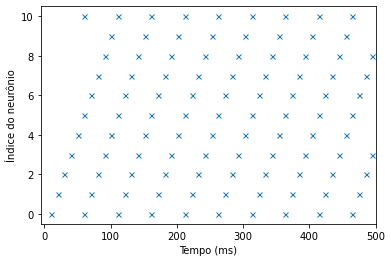

In [11]:
plot(spike_mon_neurons.t/ms, spike_mon_neurons.i, 'x', markersize = 5)
xlabel('Tempo (ms)')
ylabel('Índice do neurônio')
xlim(-5, 500)

In [5]:
spike_mon_neurons.t/ms

array([ 10.1,  20.2,  30.3,  40.4,  50.5,  60.6,  60.6,  60.6,  70.7,
        70.7,  80.8,  80.8,  90.9,  90.9, 101. , 101. , 110.7, 111.1,
       111.1, 121.2, 121.2, 131.3, 131.3, 141.4, 141.4, 151.5, 151.5,
       161.2, 161.6, 161.6, 171.7, 171.7, 181.8, 181.8, 191.9, 191.9])

In [ ]:
spike_mon_neurons.i

<spikemonitor.i: array([ 0,  1,  2,  3,  4,  0,  5, 10,  1,  6,  2,  7,  3,  8,  4,  9, 10,
        0,  5,  1,  6,  2,  7,  3,  8,  4,  9, 10,  0,  5,  1,  6,  2,  7,
        3,  8])>

In [2]:
neuron_num = {
    "Nr_nothing_f":21,
    "Nr_breeze_f":22,
    "Nr_flash_f":23,
    "Nr_stench_f":24,
    "Nr_breezeflash_f":25,
    "Nr_breezestench_f":26,
    "Nr_breezeflashstench_f":27,
    "Nr_flashstench_f":28,
    "Nr_danger_f":29,
    "Nr_obstruction_f":30,
    "Nr_goal_f":31,
    "Nr_initial_f":32,
    "Nr_nothing_r":33,
    "Nr_breeze_r":34,
    "Nr_flash_r":35,
    "Nr_stench_r":36,
    "Nr_breezeflash_r":37,
    "Nr_breezestench_r":38,
    "Nr_breezeflashstench_r":39,
    "Nr_flashstench_r":40,
    "Nr_danger_r":41,
    "Nr_obstruction_r":42,
    "Nr_goal_r":43,
    "Nr_initial_r":44,
    "Nr_nothing_l":45,
    "Nr_breeze_l":46,
    "Nr_flash_l":47,
    "Nr_stench_l":48,
    "Nr_breezeflash_l":49,
    "Nr_breezestench_l":50,
    "Nr_breezeflashstench_l":51,
    "Nr_flashstench_l":52,
    "Nr_danger_l":53,
    "Nr_obstruction_l":54,
    "Nr_goal_l":55,
    "Nr_initial_l":56,
    "Nr_nothing_b":57,
    "Nr_breeze_b":58,
    "Nr_flash_b":59,
    "Nr_stench_b":60,
    "Nr_breezeflash_b":61,
    "Nr_breezestench_b":62,
    "Nr_breezeflashstench_b":63,
    "Nr_flashstench_b":64,
    "Nr_danger_b":65,
    "Nr_obstruction_b":66,
    "Nr_goal_b":67,
    "Nr_initial_b":68,
    "Nr_recuar":69,
    "Nr_avaçar":70,
    "Nr_perseguir_f":71,
    "Nr_perseguir_l":72,
    "Nr_perseguir_r":73,
    "Nr_left_right": 74,
    "Nr_front_left": 75,
    "Nr_right_front": 76,
    "Nr_random_all":77,
    "Nr_movefront":78,
    "Nr_moveleft":79,
    "Nr_moveright":80,
    "Nr_moveback":81
}

In [5]:
import pandas as pd

In [ ]:
list(neuron_num.keys())
list(neuron_num.values())

In [12]:
s = pd.DataFrame(list(zip(list(neuron_num.keys()), list(neuron_num.values()))),
              columns=['neurônio','número'])

In [13]:
s.to_csv("de-para.csv")